In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [85]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [86]:
# describe data
df.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    object
 1   Nama Daerah                    308 non-null    object
 2   Luas Tanah (m2)                308 non-null    int64 
 3   Luas Bangunan (m2)             308 non-null    int64 
 4   Jumlah Kamar                   308 non-null    int64 
 5   Jumlah Kamar Mandi             308 non-null    int64 
 6   Tingkat/Lantai                 308 non-null    int64 
 7   Harga Penawaran (dari Owner)   308 non-null    int64 
 8   Terjual/Belum                  308 non-null    object
 9   Arah Hadap Rumah               308 non-null    object
 10  Posisi Rumah                   308 non-null    object
 11  Lebar Jalan Depan Rumah (ROW)  308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


In [88]:
df.isnull().sum()


,0
Area Category,0
Nama Daerah,0
Luas Tanah (m2),0
Luas Bangunan (m2),0
Jumlah Kamar,0
Jumlah Kamar Mandi,0
Tingkat/Lantai,0
Harga Penawaran (dari Owner),0
Terjual/Belum,0
Arah Hadap Rumah,0


In [89]:
import pandas as pd

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Print unique values for each categorical column
print("\nUnique values for categorical columns:")
for col in categorical_cols:
    print(f"\n-- {col} --")
    print(df[col].unique())


Unique values for categorical columns:

-- Area Category --
['Standard' 'Below Standard' 'Sangat Premium' 'Premium']

-- Nama Daerah --
['Citraland' 'Setro Baru Utara' 'Kenjeran' 'Gubeng' 'Sawahan' 'Mulyorejo'
 'Tegalsari' 'Tambaksari' 'Kalilom Lor Timur' 'Jelidro Manukan' 'Kalilom'
 'Bulak Cumpat barat' 'Tambak Wedi' 'Lebak Jaya'
 'Simo Gunung Kramat Timur' 'Medokan Ayu' 'Lebak Rejo' 'Medokan Sawah'
 'Klampis Ngasem' 'Medokan Sawah Timur' 'Citraland Golf Avenue'
 'Wisata Semanggi' 'Kedung Klinter' 'Gading Indah Regency'
 'Gunung Anyar Mas' 'Kutisari Utara' 'Mulyosari Tengah' 'Kapas Madya'
 'Bratang Gede' 'Citraland Utara' 'Lebak Jaya Utara' 'Mulyosari Timur'
 'Pakuwon City' 'Pakuwon city' 'Pakuwon City Florence' 'Pantai Mentari'
 'Royal Residence' 'Villa Kalijudan Indah' 'Sutorejo Timur'
 'Springville Residence' 'Sukomanunggal' 'Surabaya Pusat' 'Su' 'Mulyosari'
 'Krukah Selatan' 'Mulyosari Utara' 'Pondok Benowo Indah' 'Kenjeran Indah'
 'Tenggilis' 'Wisma Mukti' 'wonokromo' 'Sakura Re

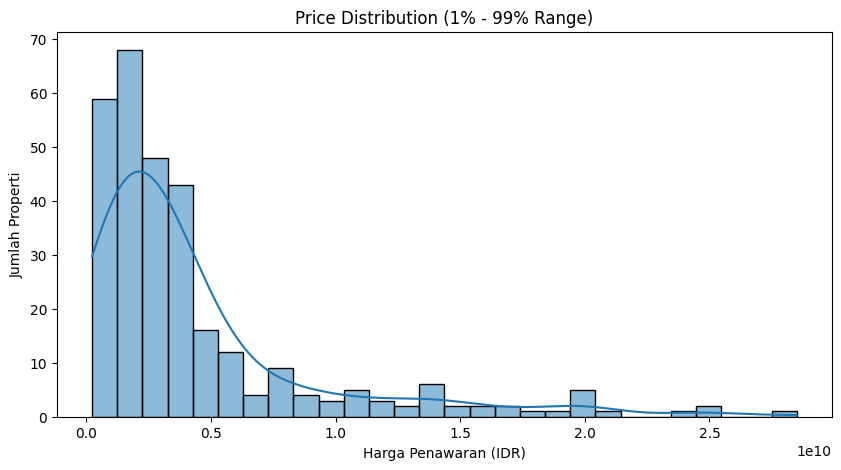

In [90]:
# Limit range using quantiles to avoid extreme outliers
low, high = df['Harga Penawaran (dari Owner)'].quantile([0.01, 0.99])
filtered = df[(df['Harga Penawaran (dari Owner)'] >= low) &
              (df['Harga Penawaran (dari Owner)'] <= high)]

plt.figure(figsize=(10,5))
sns.histplot(filtered['Harga Penawaran (dari Owner)'], kde=True)
plt.title('Price Distribution (1% - 99% Range)')
plt.xlabel('Harga Penawaran (IDR)')
plt.ylabel('Jumlah Properti')
plt.show()


This histogram shows that the distribution of property prices is highly right-skewed, meaning most properties fall within a moderate price range while only a small number are priced very high. This indicates that the dataset includes a wide range of market segments, from affordable to luxury properties, but the mid-range segment is the most dominant. The presence of extremely high price values also suggests that there are premium or exclusive properties within the dataset.

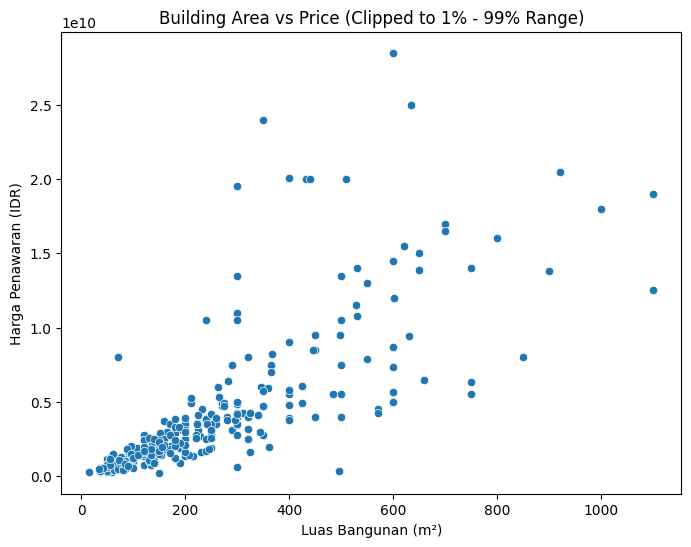

In [91]:
# Visualization 2 (Adjusted Range): Building Area vs Price
plt.figure(figsize=(8,6))
sns.scatterplot(data=filtered,
                x='Luas Bangunan (m2)',
                y='Harga Penawaran (dari Owner)')
plt.title('Building Area vs Price (Clipped to 1% - 99% Range)')
plt.xlabel('Luas Bangunan (m²)')
plt.ylabel('Harga Penawaran (IDR)')
plt.show()


The scatter plot illustrates a positive relationship between building size and property price, where larger houses tend to be offered at higher prices. However, the points are spread out, showing that building area alone does not fully determine price. This means other factors such as location, house position, and surrounding environmental value also influence pricing. As a result, properties with similar building sizes may still vary significantly in price depending on these additional features.

**Data Transformation**

In [92]:
# Encoding kolom binary: Terjual/Belum
le = LabelEncoder()
df['Terjual/Belum'] = le.fit_transform(df['Terjual/Belum'])

df.head()


,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,0,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,0,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,0,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,0,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,0,Barat,Standard,1-2 Mobil


In [93]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
sc = StandardScaler()
df_scaled = df.copy()

# Fit and transform the selected columns
df_scaled = sc.fit_transform(df[['Luas Tanah (m2)',
                                 'Luas Bangunan (m2)',
                                 'Jumlah Kamar',
                                 'Jumlah Kamar Mandi',
                                 'Tingkat/Lantai ',
                                 'Harga Penawaran (dari Owner)']])

# Convert back to DataFrame with correct column names
df_scaled = pd.DataFrame(df_scaled, columns=['Luas Tanah (m2)',
                                             'Luas Bangunan (m2)',
                                             'Jumlah Kamar',
                                             'Jumlah Kamar Mandi',
                                             'Tingkat/Lantai ',
                                             'Harga Penawaran (dari Owner)'])

df_scaled.head()


,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
0,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491
1,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600
2,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901
3,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696
4,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723


In [94]:
# get stastical information on the new dataset
df_scaled.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
count,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02
mean,2.306957e-17,8.651089e-17,-1.153478e-16,2.883696e-17,1.672544e-16,-2.451142e-17
std,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00
min,-1.056864e+00,-1.187359e+00,-1.996166e+00,-1.438941e+00,-1.658248e+00,-5.850015e-01
25%,-6.499032e-01,-6.892750e-01,-7.774956e-01,-8.233942e-01,3.137225e-01,-4.355666e-01
50%,-3.198678e-01,-3.133623e-01,-1.681606e-01,-2.078471e-01,3.137225e-01,-2.789613e-01
75%,2.781662e-01,2.916222e-01,4.411744e-01,4.077000e-01,3.137225e-01,-1.477895e-02
max,6.620801e+00,4.385546e+00,5.315854e+00,5.947624e+00,4.257663e+00,1.132640e+01


**Silhouette Score**

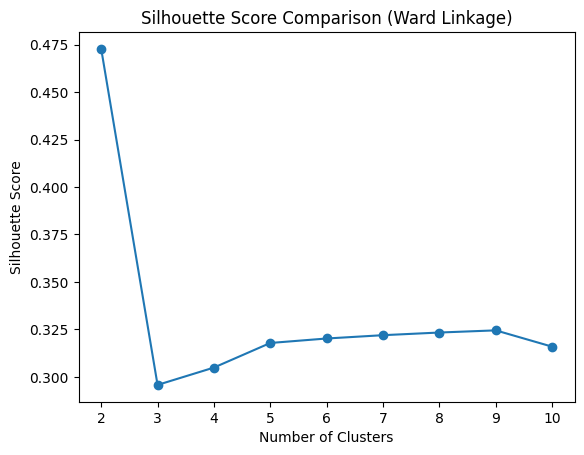

In [95]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='ward')
    cluster_labels = agglo_model.fit_predict(df_scaled)   # df_scaled dari hasil StandardScaler
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Comparison (Ward Linkage)")
plt.show()


**Comparing Silhouette Score to get best combination of linkage and metric**

Skipping Ward linkage with Manhattan metric (not supported).


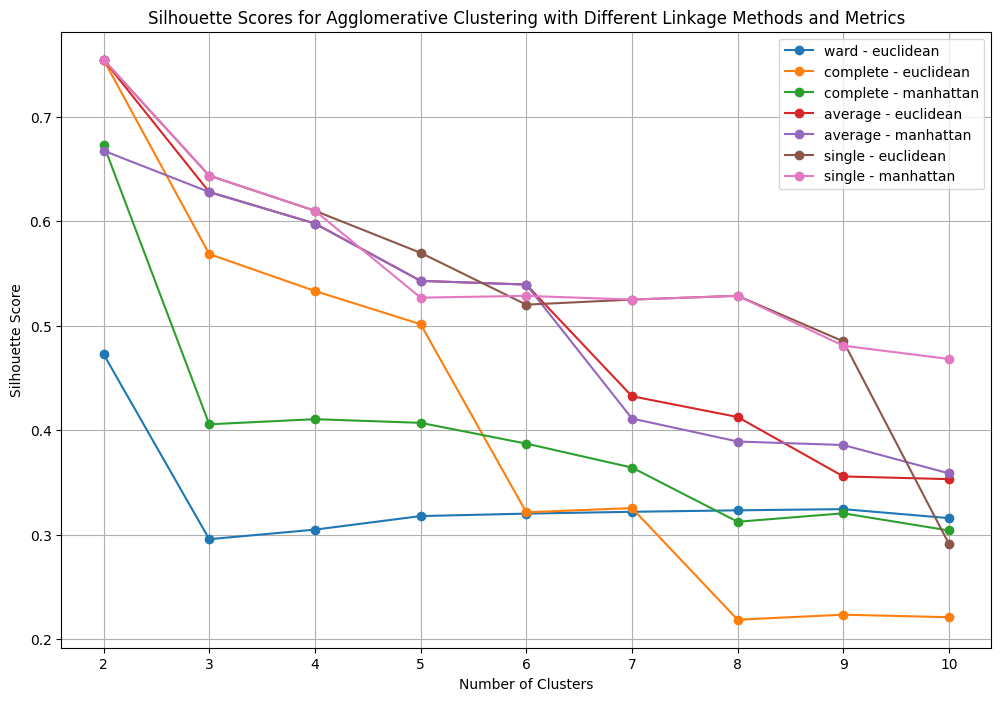

Best Silhouette Score: 0.7543687625770334
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [96]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:

            # ✅ Sesuaikan: Ward linkage tidak boleh menggunakan metric parameter
            if linkage_method == 'ward':
                agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
            else:
                agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)

            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric

        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")


**Dendogram Visualization**

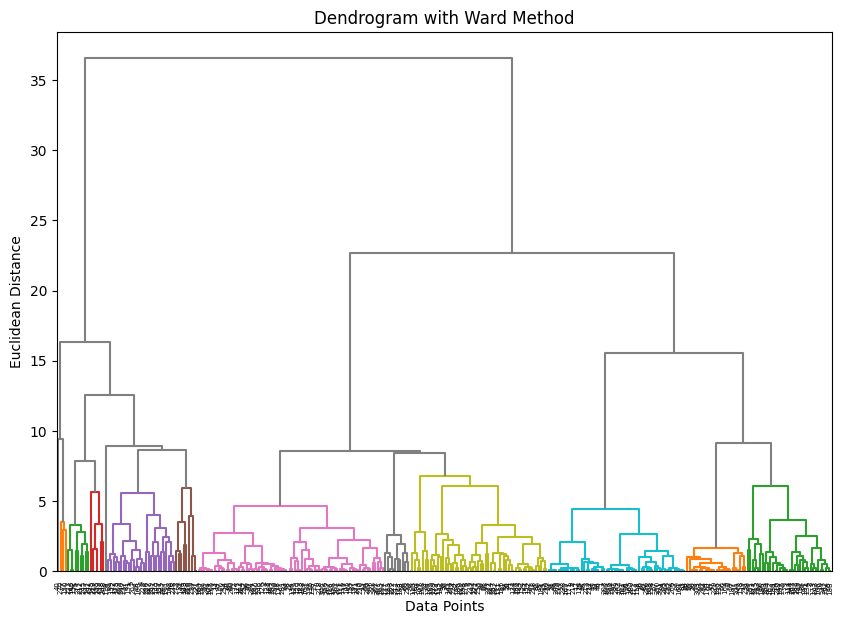

In [109]:
# Ward Method
linked = linkage(df_scaled, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

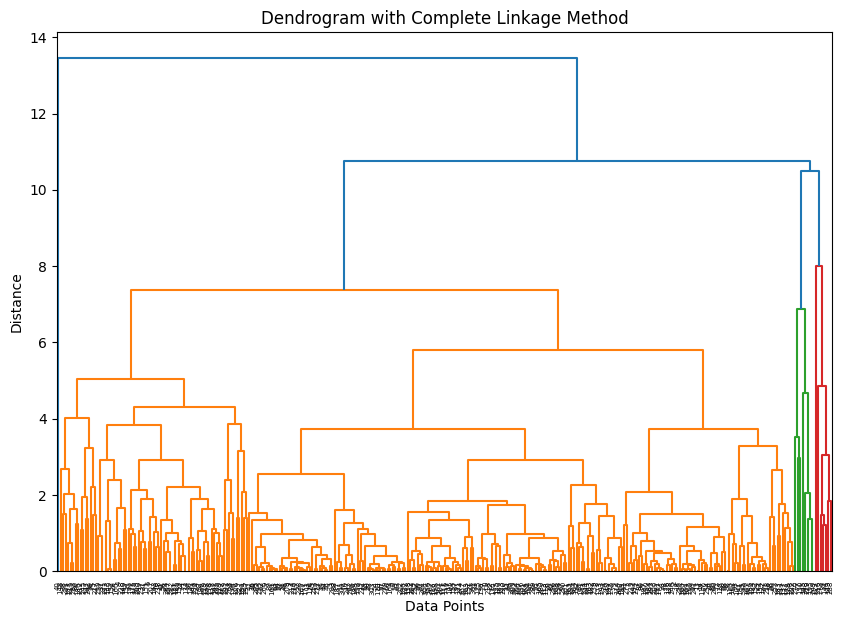

In [98]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage

# Complete Linkage Method (Max Distance)
linked = linkage(df_scaled, method='complete', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Complete Linkage Method")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


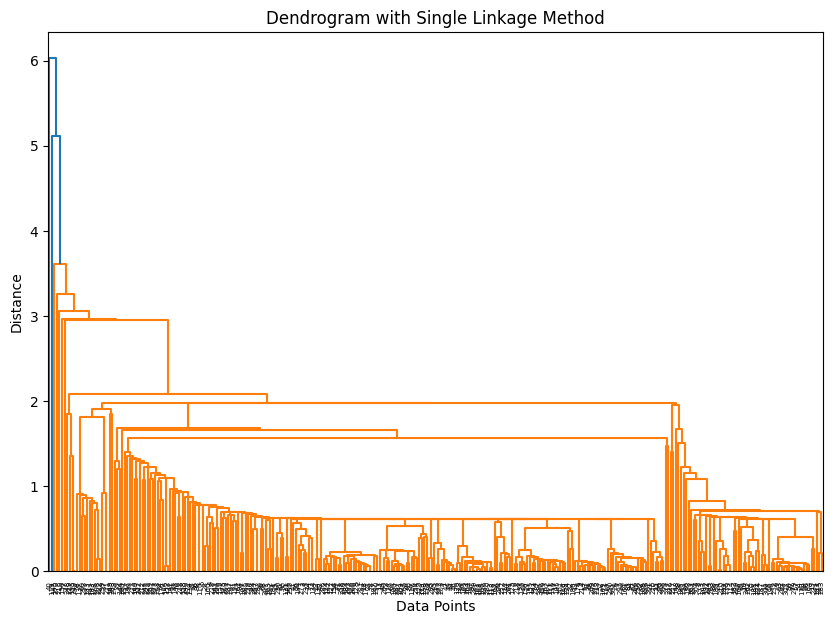

In [99]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage

# Min Distance (Single Linkage)
linked = linkage(df_scaled, method='single')   # default metric = euclidean

# Plot dendrogram dengan color_threshold yang sesuai
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Single Linkage Method")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


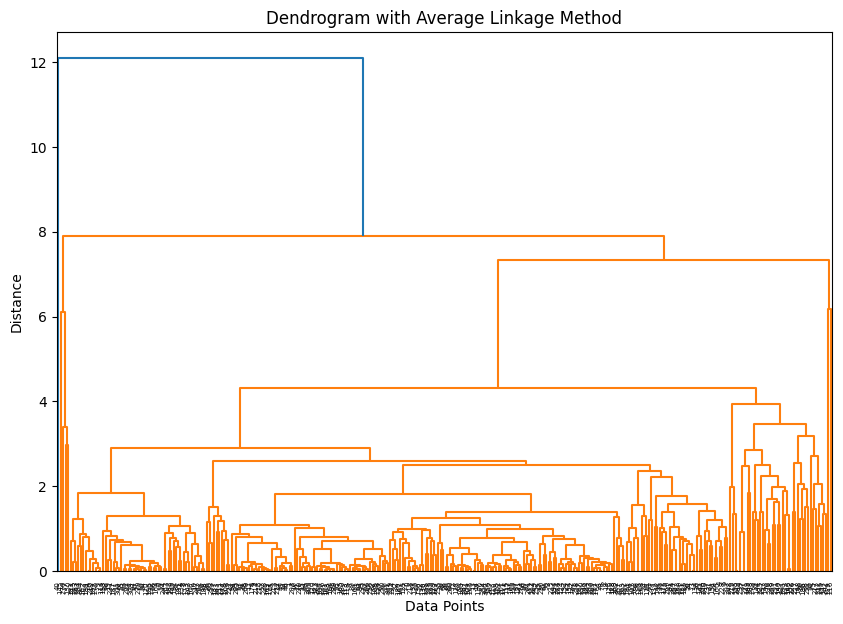

In [100]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage

# Average Distance (Average Linkage)
linked = linkage(df_scaled, method='average', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Average Linkage Method")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


The Average Linkage method merges clusters based on the average pairwise distance between all points in two clusters. This approach tends to produce clusters that are more balanced and less influenced by extreme values than Single or Complete Linkage. The dendrogram visualizes how clusters gradually merge based on average distances, which helps identify a natural separation level for forming stable property groups.

**Hierarchical Clustering Model**

In [101]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_scaled)

In [102]:
# Evaluation
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.7543687625770334


**Dendogram Visualization for Hierarchical Clustering Model**

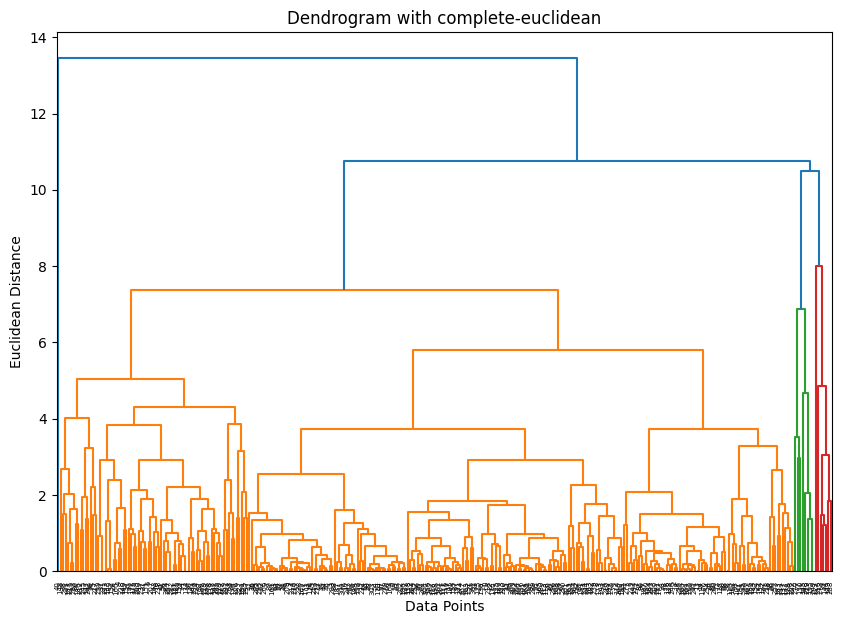

In [103]:
# Average Distance
linked = linkage(df_scaled, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

**Merge with the original data**

In [104]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Agglo
0,Standard,Citraland,240,300,4,3,2,3500000000,0,Utara,Standard,1-2 Mobil,0
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,0,Utara,Standard,< 1 Mobil,0
2,Standard,Kenjeran,170,170,5,4,2,2699999999,0,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil,0
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,0,Utara,Standard,1-2 Mobil,0
4,Premium,Kenjeran,350,600,5,5,2,5000000000,0,Barat,Standard,1-2 Mobil,0


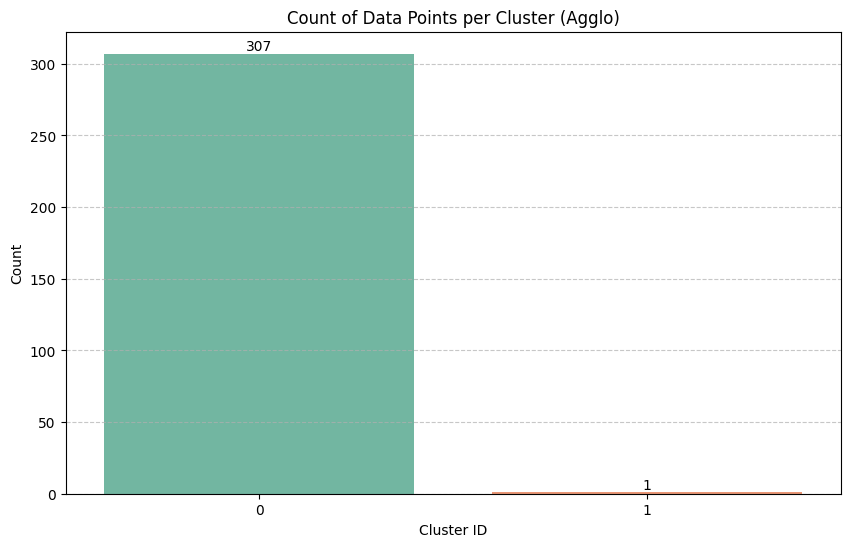

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

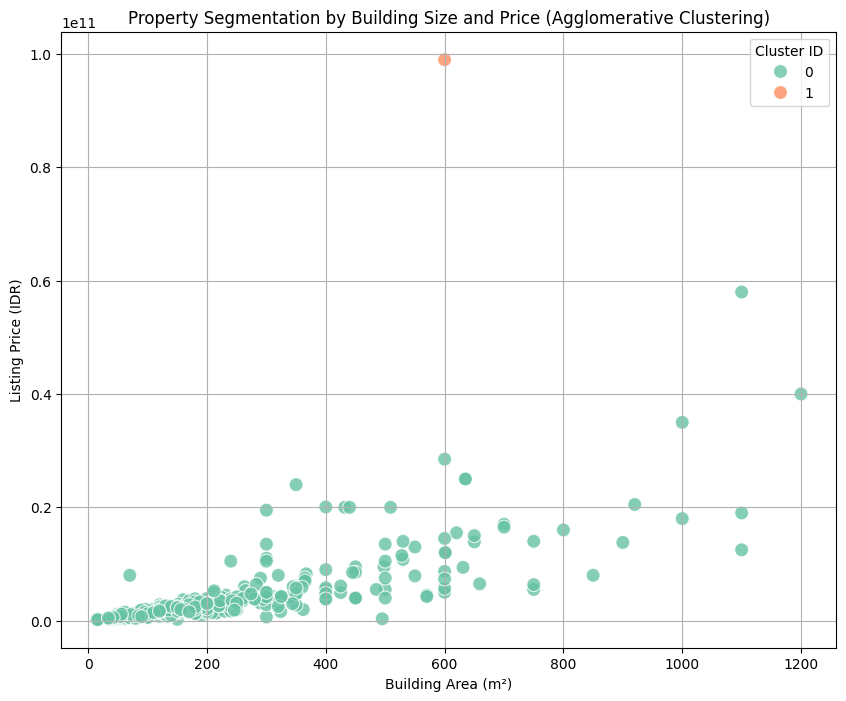

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x='Luas Bangunan (m2)',
    y='Harga Penawaran (dari Owner)',
    hue='Agglo',
    palette='Set2',
    s=100,
    alpha=0.8
)

plt.title('Property Segmentation by Building Size and Price (Agglomerative Clustering)')
plt.xlabel('Building Area (m²)')
plt.ylabel('Listing Price (IDR)')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

In [107]:
import plotly.express as px

# Define the columns for the 3D scatter plot (Adjusted for Property Dataset)
x_col = 'Luas Tanah (m2)'
y_col = 'Luas Bangunan (m2)'
z_col = 'Harga Penawaran (dari Owner)'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(
    df,
    x=x_col,
    y=y_col,
    z=z_col,
    color=df['Agglo'].astype(str),  # Color points by cluster, converted to string for discrete colors
    title='3D Property Segmentation Based on Land Area, Building Area, and Price',
    opacity=0.8
)

fig.show()

**Using Ward**

In [110]:
# Hierarchical Clustering (Ward Method)
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward')
y_hc = agglo.fit_predict(df_scaled)


In [111]:
# Evaluation (Ward Clustering)
ss = silhouette_score(df_scaled, y_hc)
print(ss)


0.4727464054343294


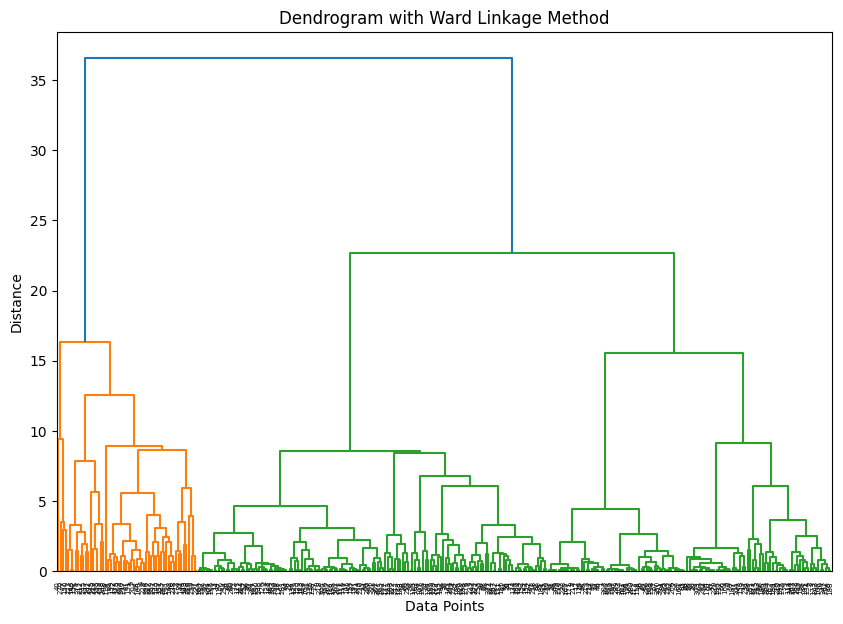

In [112]:
# Ward Method
linked = linkage(df_scaled, method='ward')  # Ward does not use 'metric' parameter

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Ward Linkage Method")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


**Merge with the original data**

In [113]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Agglo
0,Standard,Citraland,240,300,4,3,2,3500000000,0,Utara,Standard,1-2 Mobil,0
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,0,Utara,Standard,< 1 Mobil,0
2,Standard,Kenjeran,170,170,5,4,2,2699999999,0,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil,0
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,0,Utara,Standard,1-2 Mobil,0
4,Premium,Kenjeran,350,600,5,5,2,5000000000,0,Barat,Standard,1-2 Mobil,1


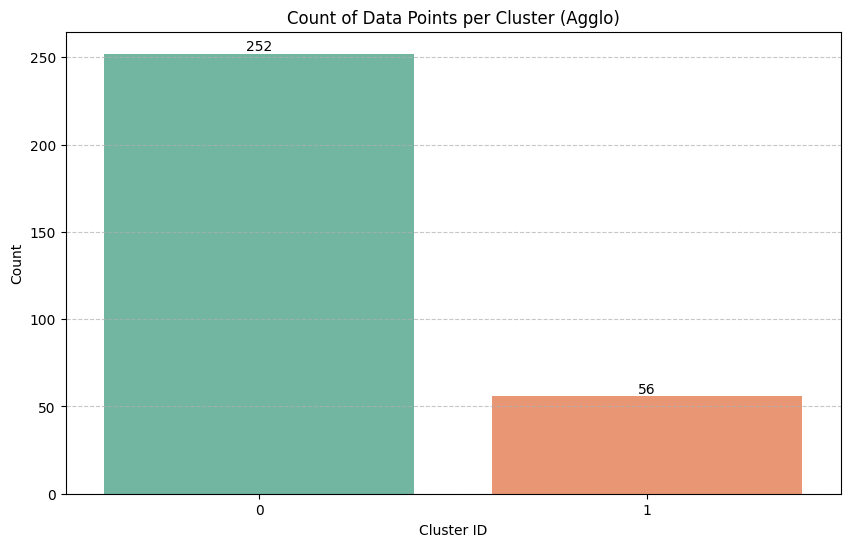

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

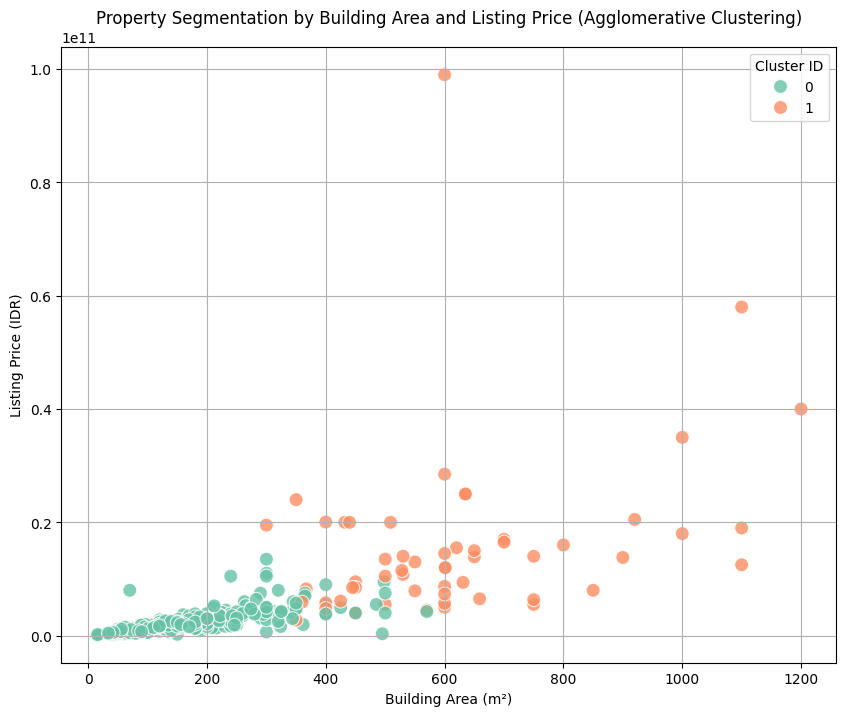

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Luas Bangunan (m2)', y='Harga Penawaran (dari Owner)', hue='Agglo', palette='Set2', s=100, alpha=0.8)
plt.title('Property Segmentation by Building Area and Listing Price (Agglomerative Clustering)')
plt.xlabel('Building Area (m²)')
plt.ylabel('Listing Price (IDR)')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

In [118]:
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Luas Tanah (m2)'
y_col = 'Luas Bangunan (m2)'
z_col = 'Harga Penawaran (dari Owner)'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df['Agglo'].astype(str), # Color points by Agglo cluster, explicitly as string for discrete colors
                    title='Interactive 3D Scatter Plot of Properties by Agglo Clusters')

fig.show()

Statistical Summary for Ward

In [121]:
# Group the data by cluster and calculate summary statistics for each cluster
cluster_summary = df.groupby('Agglo').agg({
    'Posisi Rumah': ['first', 'count'],  # representative + size
    'Luas Tanah (m2)': ['mean', 'std', 'min', 'max'],
    'Luas Bangunan (m2)': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar Mandi': ['mean', 'std', 'min', 'max'],
    'Tingkat/Lantai ': ['mean', 'std', 'min', 'max'],
    'Harga Penawaran (dari Owner)': ['mean', 'std', 'min', 'max']
})

# Rename the <lambda> column in the Posisi Rumah MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

# Set cluster index name
cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Posisi Rumah       Luas Tanah (m2)                         \
                mode count            mean         std  min   max   
cluster                                                             
0           Standard   252      155.857143   93.265992   14   525   
1           Standard    56      546.875000  245.541632  240  1561   

        Luas Bangunan (m2)                         ... Jumlah Kamar Mandi      \
                      mean         std  min   max  ...                min max   
cluster                                            ...                          
0               187.904762  106.842173   14   570  ...                  1   7   
1               621.214286  212.411240  300  1200  ...                  2  13   

        Tingkat/Lantai                    Harga Penawaran (dari Owner)  \
                   mean       std min max                         mean   
cluster                                                                  
0              1.809524  0.484242   1   3                 2.628531e+09   
1              1.982143  0.587478   1   4                 1.575027e+10   

                                                
                  std         min          max  
cluster                                         
0        2.046885e+09   160000000  13500000000  
1        1.493437e+10  2750000000  99000000000  

[2 rows x 26 columns]

Cluster 0 — Rumah Menengah Fungsional (n = 252)

Profil:
Cluster 0 berisi properti dengan luas tanah dan bangunan menengah, yaitu sekitar 156 m² untuk tanah dan 188 m² untuk bangunan. Rata-rata jumlah kamar adalah 4, dengan 2 kamar mandi, dan umumnya merupakan rumah 2 lantai. Posisi rumah paling umum adalah Standard (di tengah blok).
Rata-rata harga penawaran berada di kisaran ± Rp 2.6 Miliar.

Makna:
Cluster ini merepresentasikan segmen pasar keluarga kelas menengah yang mencari hunian nyaman dan fungsional. Pembeli di segmen ini cenderung mempertimbangkan lokasi, aksesibilitas, dan kenyamanan dasar daripada kemewahan atau ukuran lahan yang sangat luas.

Strategi:

Tawarkan paket renovasi dan interior customization untuk meningkatkan nilai tambah.

Promosikan kedekatan dengan sekolah, pusat belanja, dan fasilitas publik.

Gunakan kampanye pemasaran berbasis harga wajar dan nilai guna (value for money).

Sediakan simulasi KPR dan opsi pembayaran yang fleksibel.

Media promosi efektif: Instagram, TikTok, Marketplace Properti.

KPI Fokus:

Waktu rata-rata properti terjual (days on market)

Conversion rate inquiry → visit

KPR approval rate

Cluster 1 — Properti Premium & Lahan Luas (n = 56)

Profil:
Cluster ini berisi properti dengan luas tanah dan bangunan yang sangat besar, yaitu rata-rata ~547 m² tanah dan ~621 m² bangunan. Jumlah kamar dan kamar mandi lebih fleksibel, dan tetap didominasi 2 lantai.
Rata-rata harga penawaran berada di kisaran ± Rp 15.7 Miliar, dengan variasi hingga Rp 99 Miliar, menunjukkan segmen high-end & luxury.

Makna:
Cluster ini merupakan premium residential segment yang ditujukan untuk pembeli kelas atas, pengusaha, investor properti, atau keluarga besar. Pembeli pada segmen ini lebih mempertimbangkan prestise, luas area, keamanan, dan privasi daripada harga.

Strategi:

Buat exclusive viewing appointment (private tour, bukan open house).

Tawarkan layanan konsultasi investasi properti dan nilai apresiasi jangka panjang.

Perkuat pemasaran melalui networking agent premium dan event private, bukan promosi massal.

Kolaborasi dengan developer cluster elite, arsitek, dan interior designer.

Media promosi efektif: LinkedIn, Website Premium, Property Private Listing, Concierge Referral Network.

KPI Fokus:

Average Selling Price (ASP)

Closing rate per appointment

Client referral & repeat investment

**Statistical Summary for each cluster**

In [108]:
# Group the data by cluster and calculate summary statistics for each cluster
cluster_summary = df.groupby('Agglo').agg({
    'Posisi Rumah': ['first', 'count'],  # representative + size
    'Luas Tanah (m2)': ['mean', 'std', 'min', 'max'],
    'Luas Bangunan (m2)': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar Mandi': ['mean', 'std', 'min', 'max'],
    'Tingkat/Lantai ': ['mean', 'std', 'min', 'max'],
    'Harga Penawaran (dari Owner)': ['mean', 'std', 'min', 'max']
})

# Rename the <lambda> column in the Posisi Rumah MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

# Set cluster index name
cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Posisi Rumah       Luas Tanah (m2)                         \
                mode count            mean         std  min   max   
cluster                                                             
0           Standard   307      225.736156  201.019246   14  1561   
1           Standard     1      600.000000         NaN  600   600   

        Luas Bangunan (m2)                         ... Jumlah Kamar Mandi      \
                      mean         std  min   max  ...                min max   
cluster                                            ...                          
0               265.602606  212.655015   14  1200  ...                  1  13   
1               600.000000         NaN  600   600  ...                  5   5   

        Tingkat/Lantai                    Harga Penawaran (dari Owner)  \
                   mean       std min max                         mean   
cluster                                                                  
0              1.843648  0.506478   1   4                 4.708159e+09   
1              1.000000       NaN   1   1                 9.900000e+10   

                                                 
                  std          min          max  
cluster                                          
0        6.351742e+09    160000000  58000000000  
1                 NaN  99000000000  99000000000  

[2 rows x 26 columns]

Cluster 0 — Mayoritas Rumah Kelas Menengah (n = 307)

Profil:
Cluster ini mencakup sebagian besar properti dalam dataset. Rata-rata luas tanah sekitar 225 m², dan luas bangunan sekitar 265 m². Umumnya memiliki 4 kamar, 2–3 kamar mandi, dan 2 lantai.
Harga penawaran rata-rata berada di kisaran Rp 4.7 Miliar, dengan variasi mulai dari rumah sederhana hingga menengah-atas.

Makna:
Cluster ini merepresentasikan pasar residensial utama, yaitu keluarga menengah yang mencari hunian dengan kenyamanan dan ukuran yang proporsional.
Mereka mengutamakan fungsi, lokasi, kenyamanan, dan akses fasilitas kota.

Strategi Pemasaran:

Promosikan nilai guna (value for money) dibandingkan luas tanah saja.

Tawarkan opsi renovasi interior dan paket perabot.

Gunakan marketplace properti, Instagram, TikTok untuk menarik minat calon keluarga muda.

Sediakan simulasi KPR dan penawaran cicilan fleksibel.

KPI Fokus:

Conversion rate inquiry → site visit

KPR approval rate

Average Days on Market

Cluster 1 — Properti Super Premium / Outlier (n = 1)

Profil:
Cluster ini hanya berisi 1 properti, dengan luas tanah 600 m² dan luas bangunan 600 m², serta harga Rp 99 Miliar.
Property ini jauh di atas kisaran harga cluster lainnya dan memiliki karakteristik ultra-high-end.

Makna:
Ini adalah outlier cluster — properti super eksklusif / luxury estate, biasanya dimiliki atau dicari oleh:

High-net-worth individuals (HNWI)

Korporasi

Investor properti high-value
Bukan untuk pasar umum.

Strategi Pemasaran:

Jangan dipasarkan di kanal publik (tidak efektif dan berisiko menarik prospek yang tidak relevan).

Gunakan private showing appointment, bukan open house.

Kolaborasi dengan:

Agen properti premium

Konsultan investasi

Jaringan pengusaha / private client network

Fokus pada keamanan, privasi, desain arsitektur, dan nilai apresiasi jangka panjang.

KPI Fokus:

Closing rate per private viewing

Client referral network growth

Negotiation margin